# Heart Disease Classification

## Introduction

### Background
Cardiovascular diseases (CVDs), especially heart disorders, are a primary cause of death worldwide, according to the World Health Organization. CVDs kill 17.9 million individuals worldwide, accounting for 32% of all fatalities. Many other physiological attributes have been shown through studies and reports by the CDC and WHO to have strong links to heart disease. Particularly, cholesterol, age, resting blood pressure, smoking, and alcohol consumption appear to be most strongly linked. Detecting the existence of heart disease early on based on numerous parameters such as cholesterol, blood pressure, and age can help save more lives by allowing patients to make lifestyle adjustments or seek medical assistance sooner. 

The aim of this project is to build a classifier using KNN classification to answer the following question: **Is heart disease present (values = 1, 2, 3, 4) or absent (value = 0) in a new patient?**

### Data set
To answer this question we will analyze data downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). There are 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach in the downloaded data. Below, we compile these databases into one dataset `heart_disease_dataset`. Each row in the data set contains data about one patient. We will add a column `presence` (the predicted attribute) to indicate the presence or absense of heart disease. In our project we will use 3 of these attributes as predictor variables namely trestbps (resting blood pressure), chol (serum cholestoral in mg/dl), and age (age in years) to predict the presence or absence of heart disease on a new patient. 

Relevant columns in the dataset:

- `age` - age in years
- `sex` - sex (1 = male; 0 = female)
- `cp` - chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - serum cholestoral in mg/dl
- `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- `restecg` - resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- `thalach` - maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
- `slope` - the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- `ca` - number of major vessels (0-3) colored by flourosopy
- `thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect
- `presence` - predicted attribute 


## Preliminary exploratory data analysis


### Loading Libraries

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Reading data and Preprocessing

In [2]:
path_names <- list("data/processed.cleveland.data", "data/processed.switzerland.data", "data/processed.va.data")
factors <- list("cleveland", "switzerland", "va")
colnames <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "presence")

heart_disease_data <- read_delim("data/reprocessed.hungarian.data", delim = " ", col_names = colnames) %>% mutate(region = factor("hungary"))

i <- 1 # for every iteration in the loop, increment by 1
for (p in path_names) {
    # for every file processed, add a col that has the region name
    data_from_file <- read_csv(p, col_names = colnames, na = c("?")) %>%
      mutate(region = factor(factors[i]))

    # add the freshly read data to the master data frame
    heart_disease_data <- rbind(heart_disease_data, data_from_file)

    # increment to keep track of the position in the list of files
    i <- i + 1
}

heart_disease_data <- mutate_at(heart_disease_data, vars(presence), factor) # create a new col presence to df
heart_disease_data <- heart_disease_data %>% select(age, trestbps, chol, thalach, oldpeak, region, presence)

heart_disease_data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  presence = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  presence = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_doubl

age,trestbps,chol,thalach,oldpeak,region,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
40,140,289,172,0.0,hungary,0
49,160,180,156,1.0,hungary,1
37,130,283,98,0.0,hungary,0
48,138,214,108,1.5,hungary,3
54,150,-9,122,0.0,hungary,0
39,120,339,170,0.0,hungary,0
45,130,237,170,0.0,hungary,0
54,110,208,142,0.0,hungary,0
37,140,207,130,1.5,hungary,1


## 3. Methods

In [3]:
# Summary of all attributes (columns)
summary(heart_disease_data)

      age           trestbps        chol          thalach     
 Min.   :28.00   Min.   : -9   Min.   : -9.0   Min.   : -9.0  
 1st Qu.:47.00   1st Qu.:120   1st Qu.:167.0   1st Qu.:120.0  
 Median :54.00   Median :130   Median :222.0   Median :140.0  
 Mean   :53.51   Mean   :132   Mean   :193.9   Mean   :137.4  
 3rd Qu.:60.00   3rd Qu.:140   3rd Qu.:267.0   3rd Qu.:157.0  
 Max.   :77.00   Max.   :200   Max.   :603.0   Max.   :202.0  
                 NA's   :58    NA's   :7       NA's   :54     
    oldpeak                region    presence
 Min.   :-2.6000   hungary    :294   0:411   
 1st Qu.: 0.0000   cleveland  :303   1:196   
 Median : 0.5000   switzerland:123   2:135   
 Mean   : 0.8788   va         :200   3:135   
 3rd Qu.: 1.5000                     4: 43   
 Max.   : 6.2000                             
 NA's   :62                                  

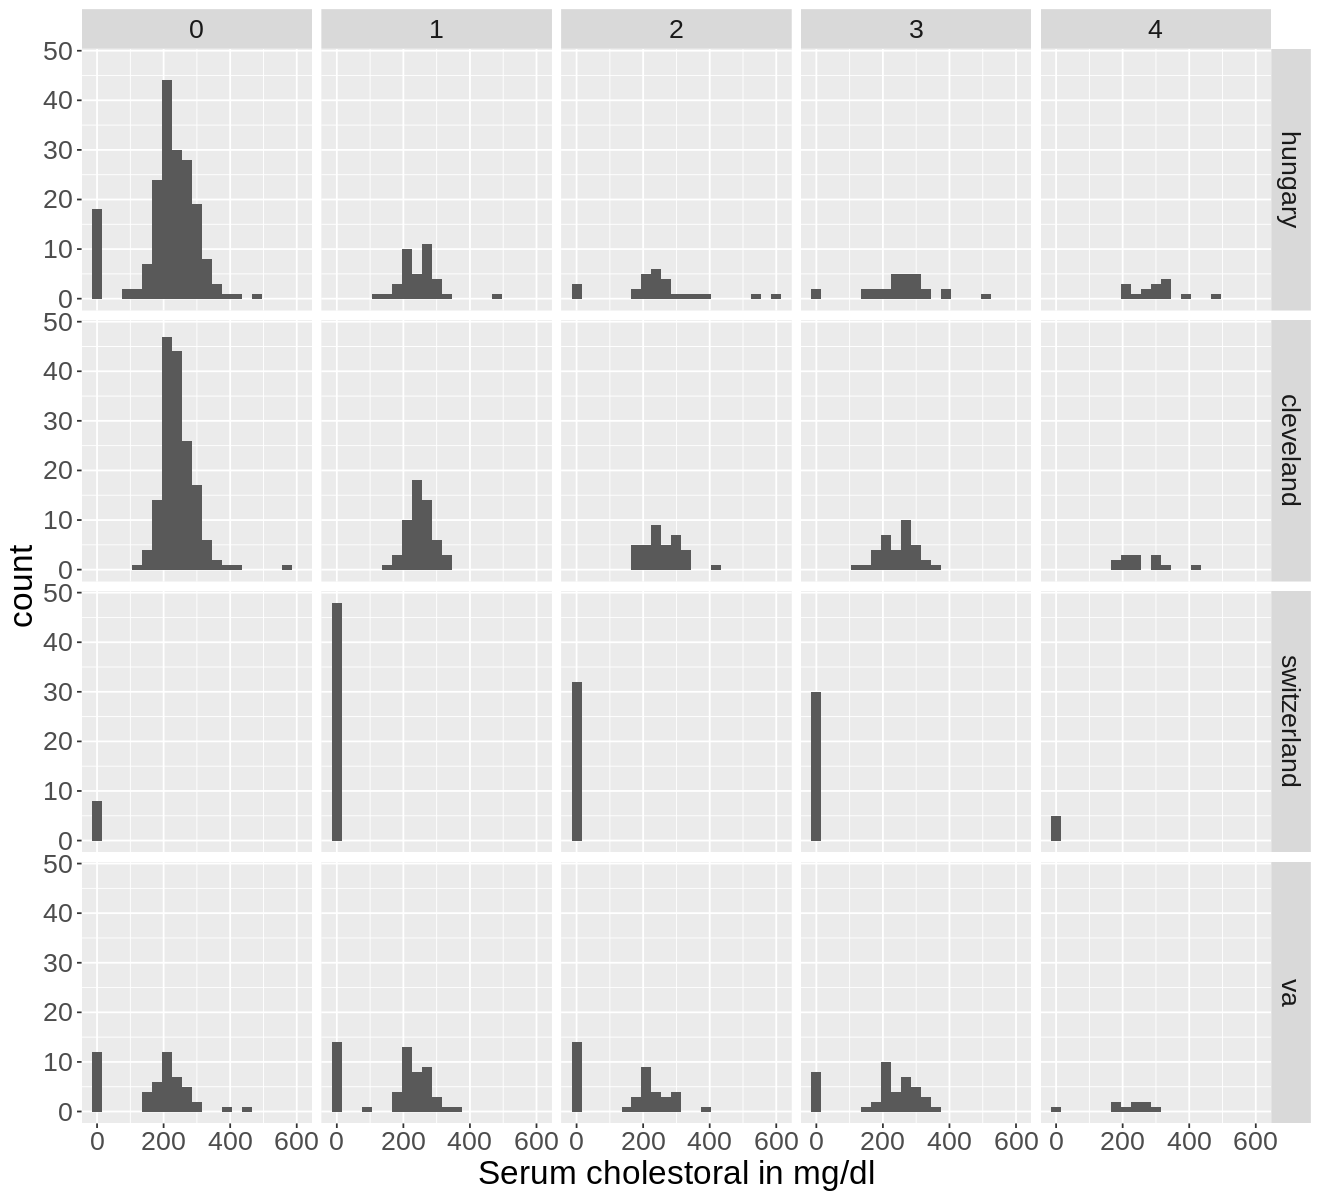

In [17]:
# Cholestrol Analysis - original histogram of chol distribution
options(repr.plot.width = 11, repr.plot.height = 10)

ggplot(heart_disease_data, aes(x = chol)) + 
  geom_histogram(na.rm = TRUE, binwidth = 30) +
  facet_grid(rows = vars(region), cols = vars(presence)) +
labs(x = "Serum cholestoral in mg/dl") +
theme(text = element_text(size = 20)) 

`summarise()` regrouping output by 'presence' (override with `.groups` argument)



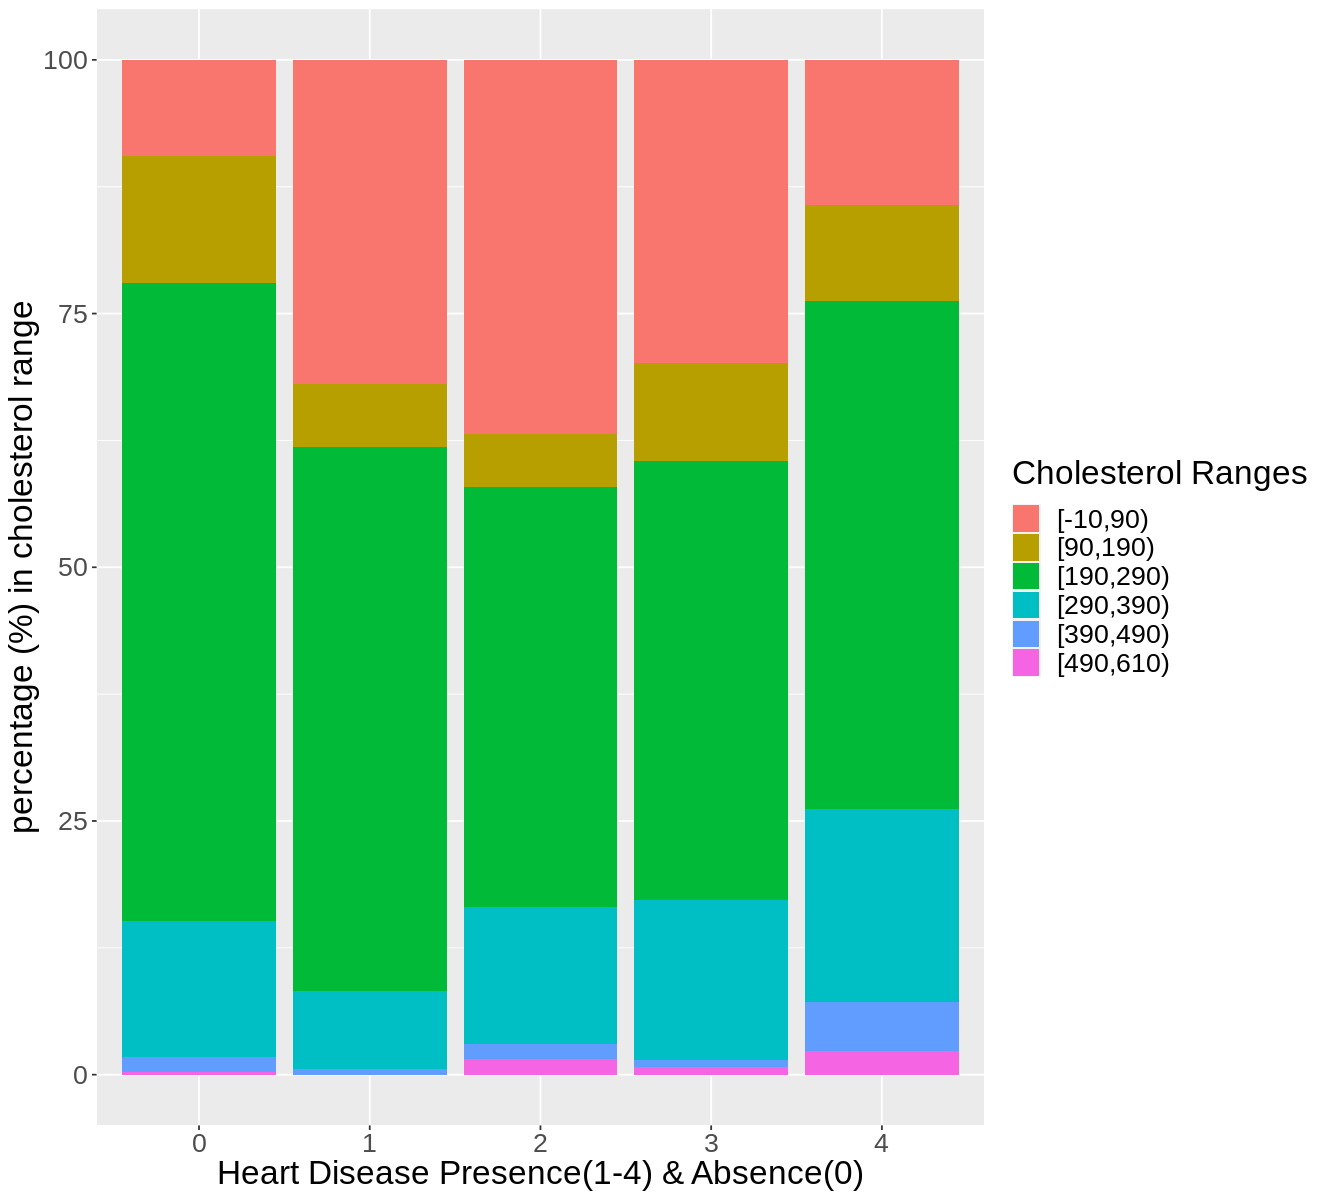

In [22]:
# Manual split of ranges of cholesterol
heart_disease_data %>%
  filter(!is.na(chol)) %>%
  group_by(presence) %>%
  mutate(chol_bin = cut(chol,
                        breaks = c(-10, 90, 190, 290, 390, 490, 610),
                        right=FALSE)) %>%
  group_by(presence, chol_bin) %>%
  summarize(n = n()) %>%
  mutate(percent = 100 * (n / sum(n))) %>%
  ggplot(aes(y = percent, x = presence, fill = chol_bin)) +
  geom_bar(stat = "identity", position = "stack") +
  #facet_grid(rows = vars(presence)) +
  labs(y = "percentage (%) in cholesterol range", x = "Heart Disease Presence(1-4) & Absence(0)",
       fill = "Cholesterol Ranges") +
theme(text = element_text(size = 20)) 


ERROR while rich displaying an object: Error: stat_bin() requires an x or y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(captur

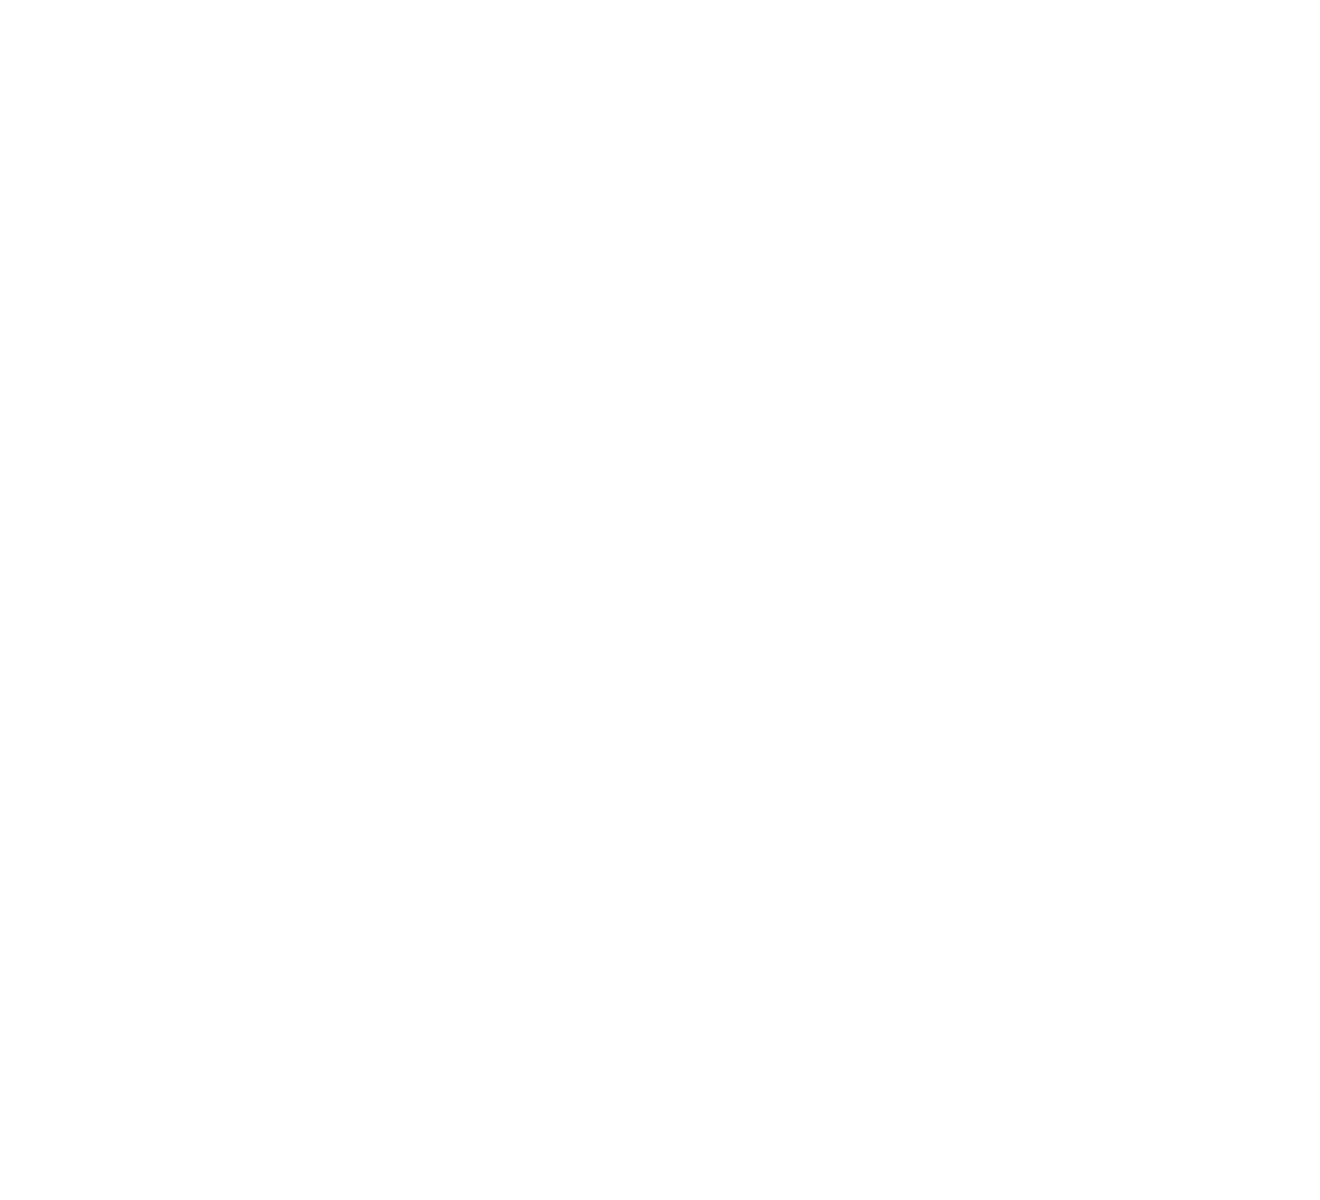

In [18]:

# Density plot
ggplot(heart_disease_data, aes(names("chol"), 
                               after_stat(density),
                               fill = presence)) +
  geom_histogram(binwidth = 20) + 
  labs(y = "Density of Heart Disease Categories",
       x = "Serum Cholesterol Levels (mg/dl)",
       fill = "Heart Disease")


chol_range_table <- heart_disease_data %>%
  filter(!is.na(chol)) %>%
  group_by(presence) %>%
  mutate(chol_bin = cut_width(chol, width = 100)) %>%
  group_by(presence, chol_bin) %>%
  summarize(n = n()) %>%
  pivot_wider(names_from = chol_bin, values_from = n)

Warning message:
“Removed 181 rows containing non-finite values (stat_bin).”


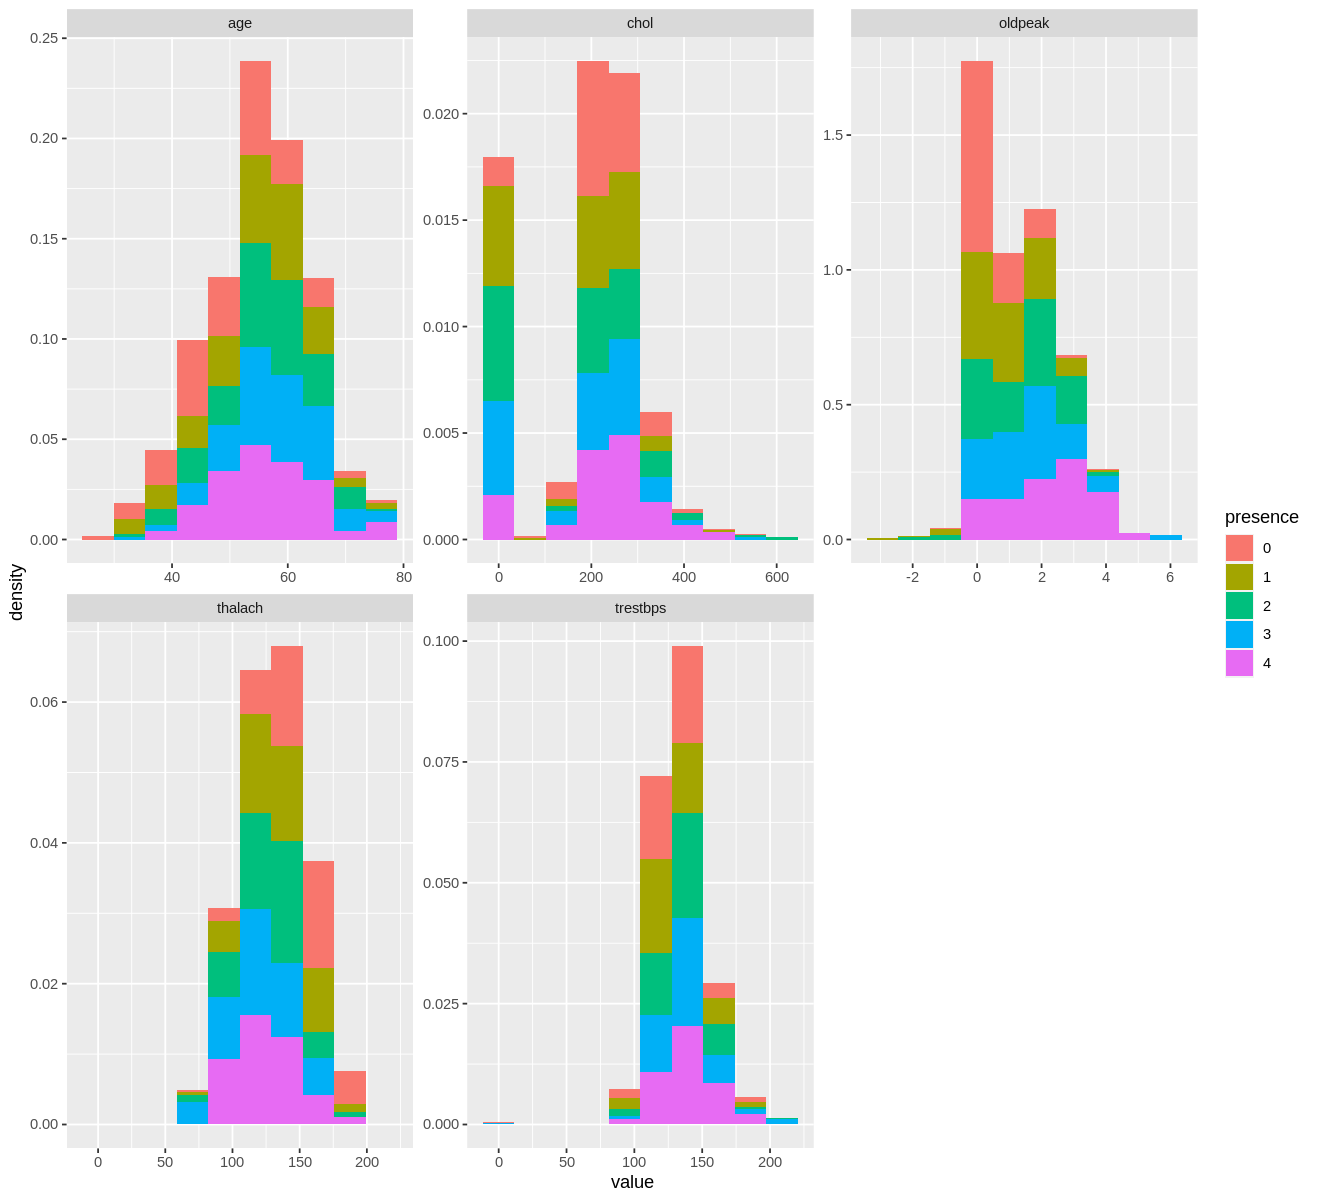

In [12]:

# Density Plot of All 5 Variables # ----
heart_disease_data %>%
  pivot_longer(cols = age:oldpeak, names_to= "type", values_to = "value") %>%
  ggplot(aes(x = value, after_stat(density), fill = presence)) +
  geom_histogram(bins = 10) + 
  facet_wrap(.~ type, scales = "free")


In [24]:
# Interval Splitter and Table 
library(stringr)
interval_count <- function() {
  heart_disease_count <- heart_disease_data %>%
    filter(!is.na(age)) %>%
    group_by(presence) %>%
    mutate(age = cut_interval(age, n = 5)) %>%
    count(presence, age) %>%
    mutate(type = factor("age")) %>%
    setNames(c("presence", "range", "n", "type"))
  heart_disease_count
  
  for (name in c("trestbps", "chol", "thalach", "oldpeak")) {
    heart_disease_range <- heart_disease_data %>%
      filter(!is.na(!!sym(name))) %>%
      group_by(presence) %>%
      mutate(!!sym(name) := cut_interval(!!sym(name), n = 5)) %>%
      count(presence, !!sym(name)) %>%
      mutate(type = factor(name)) %>%
      setNames(c("presence", "range", "n", "type"))
    heart_disease_range

    heart_disease_count<- rbind(heart_disease_count, heart_disease_range)
  }
  return(heart_disease_count)
}
heart_disease_split_data <- interval_count() %>%
  group_by(presence, type) %>%
  mutate(pert = n/sum(n)* 100)


## Expected outcomes & significance

#### What do you expect to find?
We should be able to predict the presence or absence of heart disease in new patients based on factors we have considered to train and test our model with good accuracy.

#### What impact could such findings have?
Detecting the existence of heart disease early on based on numerous parameters such as cholesterol, blood pressure, and age can help save more lives by allowing patients to make lifestyle adjustments or seek medical assistance sooner. It could lead to fewer deaths due to heart disease, extend an individual's lifetime, or just make their quality of life better. 

#### What future questions could this lead to?
Are there some factors which are important than others to monitor to detect the rpesence or absence of heart disease? If in the the future, more factors are considered would that lead to better accuracy and a better model? Are there other factors not included in this dataset which could be equally important in predicting presence of heart disease? 